In [1]:
import pandas as pd
import glob
from functools import reduce
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [82]:
df = pd.read_csv('./data/avrRps4_counts.csv')

In [83]:
df = df.set_index('target_id')

In [84]:
df.head()

,SRR11510194,SRR11510195,SRR11510196,SRR11934411,SRR11934414,SRR11934417,SRR11934420,SRR11934425,SRR11934428,SRR11934439,...,SRR5712382,SRR5712396,SRR6003795,SRR6003802,SRR6003824,SRR6003827,SRR7429873,SRR7429877,SRR7429885,SRR7429889
target_id,,,,,,,,,,,,,,,,,,,,,
AT1G01010.1,31.03670,29.89980,37.07170,57.34140,49.79520,32.328100,6.298350,1.249160,1.64129,50.807800,...,0.000000e+00,0.456898,14.88920,18.200800,123.681,0.00,42.20210,27.44840,37.28810,25.08500
AT1G01020.1,14.03261,9.84591,19.30832,13.23000,8.80766,9.955352,7.101991,6.493234,5.96291,7.214118,...,6.968100e-09,0.000000,3.54339,3.953870,0.000,0.00,21.29301,6.50675,16.57026,10.54434
AT1G01030.1,19.48900,9.60096,20.38150,5.72250,2.75072,0.000000,8.010220,2.808120,1.31314,4.241370,...,0.000000e+00,0.000000,3.62661,4.315760,0.000,0.00,9.30806,4.43136,7.07438,4.04681
AT1G01040.1,13.89125,11.07766,10.69723,18.17645,13.00319,16.760540,11.207830,15.051730,10.07880,14.483570,...,1.798660e+00,1.791200,2.41434,0.876451,0.000,14.26,14.43695,15.34053,13.40544,18.52872
AT1G01050.1,34.02910,21.80460,45.40820,38.43170,19.28250,19.139100,47.832800,44.452800,40.70090,30.836200,...,1.243960e+01,5.990250,28.85970,47.094300,0.000,0.00,75.22570,76.22990,104.37700,96.86100


In [85]:
df_info = pd.read_csv('./data/avrRps4SampleInfo.csv')

In [102]:
df_info

,run,treatment,OD,stage,time
0,SRR11510194,1,0.0005,4,4.0
1,SRR11510195,1,0.0005,4,4.0
2,SRR11510196,1,0.0005,4,4.0
3,SRR7429855,1,0.0050,4,8.0
4,SRR7429859,1,0.0050,4,24.0
...,...,...,...,...,...
65,SRR5712382,0,0.0002,4,24.0
66,SRR5712396,0,0.0002,4,24.0
67,SRR5167844,0,0.0000,4,0.0
68,SRR5167845,0,0.0000,4,0.0


In [86]:
m = []
for x in df_info.run:
    if x in df.columns:
        m.append(True)
    else:
        m.append(False)

In [88]:
from sklearn.ensemble import RandomForestClassifier

In [89]:
X = df.T.values

In [90]:
fi_list = []
for x in range(100):
    rf  = RandomForestClassifier(n_estimators=5000, n_jobs=10)
    rf.fit(X,Y)
    fi = rf.feature_importances_ 
    fi_list.append(fi)

In [91]:
fi_fix = np.sum(np.stack(fi_list, axis=0),axis=0)

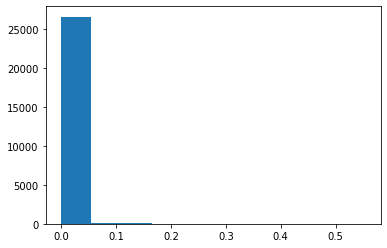

In [92]:
plt.hist(fi_fix)
plt.show()

In [97]:
cut = np.percentile(fi_fix[(fi_fix != 0 )],99)

In [98]:
cut

0.06458805973538588

In [99]:
m = fi_fix > cut

In [100]:
f = open('candidate_gene.txt', 'w')
for x in df[m].index:
    f.write(x + '\n')
f.close()

In [103]:
df[m]

,SRR11510194,SRR11510195,SRR11510196,SRR11934411,SRR11934414,SRR11934417,SRR11934420,SRR11934425,SRR11934428,SRR11934439,...,SRR5712382,SRR5712396,SRR6003795,SRR6003802,SRR6003824,SRR6003827,SRR7429873,SRR7429877,SRR7429885,SRR7429889
target_id,,,,,,,,,,,,,,,,,,,,,
AT1G01160.1,26.858040,19.247720,21.592053,37.73244,30.820470,30.871200,17.194910,16.570410,15.106070,29.770400,...,78.751500,74.787100,18.587800,18.887200,0.000,191.4150,24.695222,40.486200,25.477510,35.893420
AT1G02950.1,3.286420,4.004590,0.485946,10.69750,9.240240,7.035160,9.291780,5.279417,10.399519,13.377600,...,0.000000,0.918112,0.731323,0.222202,0.000,0.0000,2.388680,1.661370,7.183340,2.489760
AT1G03440.1,3.865090,2.192450,3.725930,5.60619,6.584580,9.089000,5.777150,8.020530,4.913680,5.333400,...,6.679900,5.937090,11.513300,13.429700,0.000,41.5649,6.146490,7.882980,7.019780,8.451250
AT1G06010.1,9.534340,5.483940,10.521300,4.90794,6.628140,7.424130,5.676900,3.677960,4.602400,4.340310,...,11.027500,10.570000,0.728225,3.318910,0.000,0.0000,13.553200,8.342050,16.056500,10.501300
AT1G06830.1,22.190400,27.285300,22.855000,18.38530,12.478300,18.916000,59.926100,96.974300,93.415000,15.425100,...,7.414500,0.000000,0.000000,1.338910,0.000,0.0000,26.370400,5.384540,26.285400,0.504336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AT5G64640.1,8.824590,8.077160,9.994860,3.17749,3.003820,2.523420,6.303190,4.554010,5.475160,4.355490,...,0.749637,0.979819,2.970240,5.866020,0.000,0.0000,3.587490,0.567083,2.451920,0.679873
AT5G65550.1,0.431079,0.879085,0.576612,1.24881,0.472223,0.626369,0.202226,0.421132,0.000000,0.331314,...,0.000000,0.513450,0.000000,0.236457,0.000,0.0000,0.256354,0.000000,0.373027,0.133601
AT5G65610.1,15.529300,7.843590,13.109700,9.95102,6.045370,2.371260,5.289860,14.859500,2.835800,6.523310,...,22.068100,25.269100,25.327100,49.987200,0.000,0.0000,15.932200,15.790100,18.539400,23.566300
